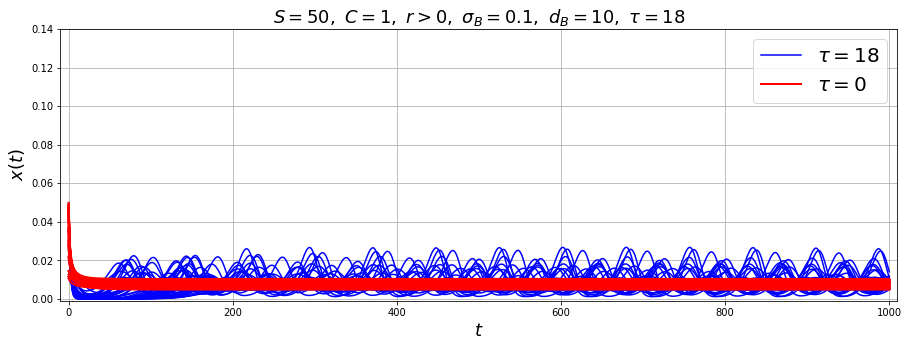

In [22]:
# This is a rutine to simulate the eigenvalues and trajectories of the 
# Delayed GLV using the ddeint. Refrence: arXiv:2110.11914

from pylab import *
from ddeint import ddeint
import matplotlib.pyplot as plt
from numpy import linalg as LA
import random

def random_float(low, high):
    return random.random()*(high-low) + low
# Create the bifurcation diagram

def randbin(M,N,P):              # function to generate random binary matrix    
    mat = (np.random.rand(M,N)<=P).astype(int)
    return mat  

Color = ["b", "c", "g","r","m","y"]

############### PARAMETERS ##################################

S=50                 # Number of Species
C=1                  # Connectedness
grid=5000            # grid of the numerical simulation
t_f=1000             # length of trajectories
sigma=.1             # standard deviation
d1=-10                # self-regulation
tau=18               # discrete delay

############### Random Matrix ##################################

RM=(np.random.normal(0,sigma,(S,S)))
B = randbin(S,S,C)
A=np.multiply(RM,B)
np.fill_diagonal(A,d1)

############### Intrinsic growth rate, r, and initials ##################################

r=np.array(np.zeros(S))
ini=np.array(np.zeros(S))
A_inv=np.linalg.inv(A)

for i in range(S):
    r[i]=random_float(.05,.1)
    ini[i]=random_float(.01,.05)

############### Numerical simulation of the dynamics using ddeint  ##################################

    
def model(X,t,d):
    x = X(t)
    y = X(t-d)
    F=[]
    for s in range(S):    
        F.append(x[s]*(r[s]+A[s,:]@y.T[:]))
    return array(F)


g = lambda t : ini
tt = linspace(0,t_f,grid)



plot1 = plt.figure(figsize=(15,5))

 

for d in [tau]:
    yy1 = ddeint(model,g,tt,fargs=(d,))
    # WE PLOT X AGAINST Y
    jj=0
    for i in range(S-1):
        plt.plot(tt[:],yy1[:,i],color="b")

    plt.plot(tt[:],yy1[:,S-1],color="b",label='$\\tau=%s$' % d)

for d in [0]:
    yy1 = ddeint(model,g,tt,fargs=(d,))
    # WE PLOT X AGAINST Y
    for i in range(S-1):
        plt.plot(tt[:],yy1[:,i],lw=2,color="r")
    plt.plot(tt[:],yy1[:,S-1],lw=2,color="r",label='$\\tau=%s$' % d)
    
    
############### Plot  ########################################################################
    
    plt.ylim(-.001, .14)
    plt.xlim(-10, 1010)
    plt.xlabel('$t$',fontsize=18)
    plt.ylabel('$x(t)$',fontsize=18)
    plt.title('$ S=%s,\ C=1,\ r>0, \ \sigma_B=0.1, \ d_{B}=%s,\ \\tau=%s$'% (S,-d1,tau),fontsize=18)

    plt.grid(True)
    plt.legend(fontsize=20,loc='upper right')

